# Humpback Whale Identification 
## Kaggle competition
https://www.kaggle.com/c/humpback-whale-identification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import pandas as pd
import numpy as np

In [3]:
# bath size
bs = 16

In [4]:
# see what is in the data
path = Path('/home/jupyter/HumpbackWhaleIdentification/data')
path.ls()

[PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/train.csv'),
 PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/test'),
 PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/train'),
 PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/sample_submission.csv')]

In [5]:
labels = pd.read_csv(path/'train.csv')

In [7]:
labels.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [9]:
doc(ImageDataBunch)

class ImageDataBunch [source] ImageDataBunch ( train_dl : DataLoader , valid_dl : DataLoader , fix_dl : DataLoader = None , test_dl : Optional [ DataLoader ]= None , device : device = None , dl_tfms : Optional [ Collection [ Callable ]]= None , path : PathOrStr = '.' , collate_fn : Callable = 'data_collate' , no_check : bool = False ) :: DataBunch 
 
 DataBunch suitable for computer vision. 
 Show in docs

In [10]:
img = open_image(path/'train/d3252cbf1.jpg')

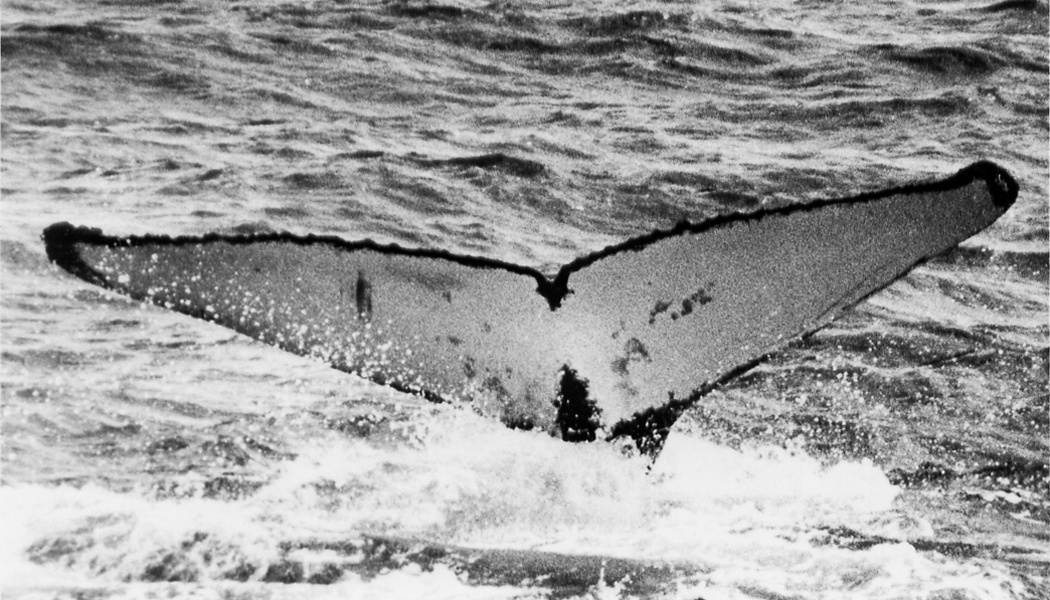

In [11]:
img

In [12]:
img.shape

torch.Size([3, 600, 1050])

In [14]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path=path, folder='train', csv_labels='train.csv', test='test', 
                               size=224, bs=16) #.normalize(imagenet_stats)

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:487: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
w_9888ce0, w_9ff0b7b, w_ebe9709, w_34053b9, w_52db74a...
  if getattr(ds, 'warn', False): warn(ds.warn)


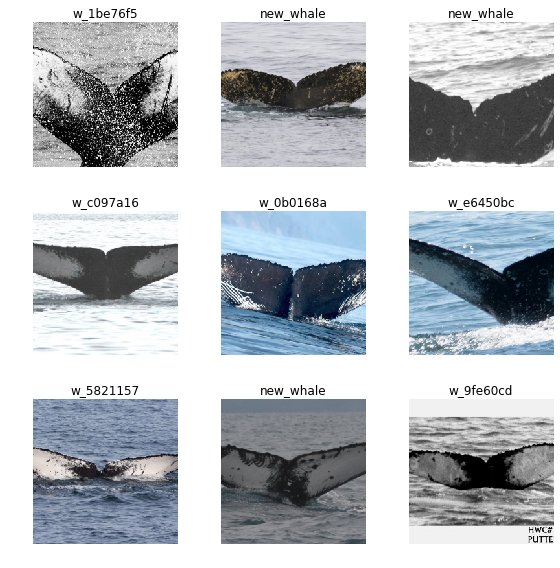

In [15]:
data.show_batch(rows=3, figsize=(8,8))

In [16]:
len(data.classes)

4571

In [18]:
data.c
len(data.train_ds)+len(data.valid_ds)

24880

In [21]:
learn = create_cnn(data, models.resnet18,  metrics=accuracy)

In [22]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,6.049052,5.148464,0.424744


In [23]:
learn.save('stage-1')

## look at model 

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

In [25]:
len(data.valid_ds), len(losses), len(idxs)

(4591, 4591, 4591)

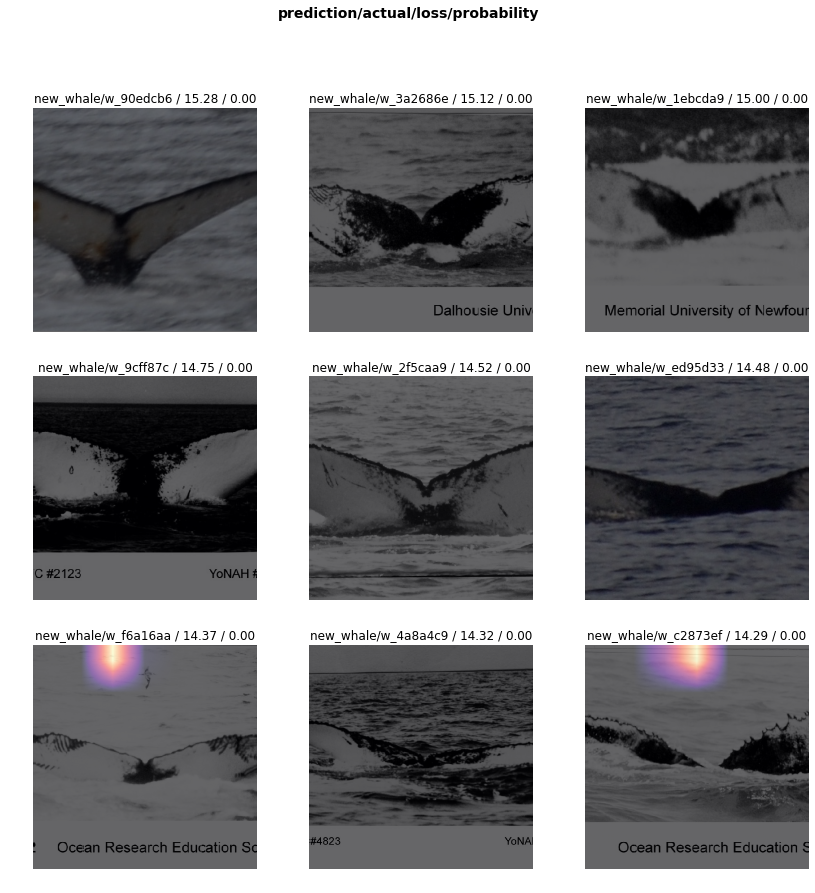

In [28]:
interp.plot_top_losses(9, largest=True, figsize=(14, 14))

# Submit predictions

In [32]:
preds = learn.get_preds(ds_type='test')

In [45]:
preds_t = preds[0]

In [46]:
labels_list = data.classes

In [ ]:

sample_list = list(sample_df.Image)
pred_list = [[labels_list[i] for i in p.argsort()[-5:][::-1]] for p in preds_t]
pred_dic = dict((key, value) for (key, value) in zip(learn.data.test_ds.fnames,pred_list))
pred_list_cor = [' '.join(pred_dic[id]) for id in sample_list]
df = pd.DataFrame({'Image':sample_list,'Id': pred_list_cor})
df.to_csv('submission.csv'.format(MODEL_PATH), header=True, index=False)
df.head()

In [43]:
sample_df = pd.read_csv("data/sample_submission.csv")

In [49]:
len(preds_t)

20289

In [47]:
pred_list = [[labels_list[i] for i in p.argsort()[-5:][::-1]] for p in preds_t]

ValueError: negative step not yet supported